# Processamento de Imagens


## Aula 1

In [1]:
import cv2
import numpy as np
print(cv2.__version__)

3.4.1


Lendo imagem

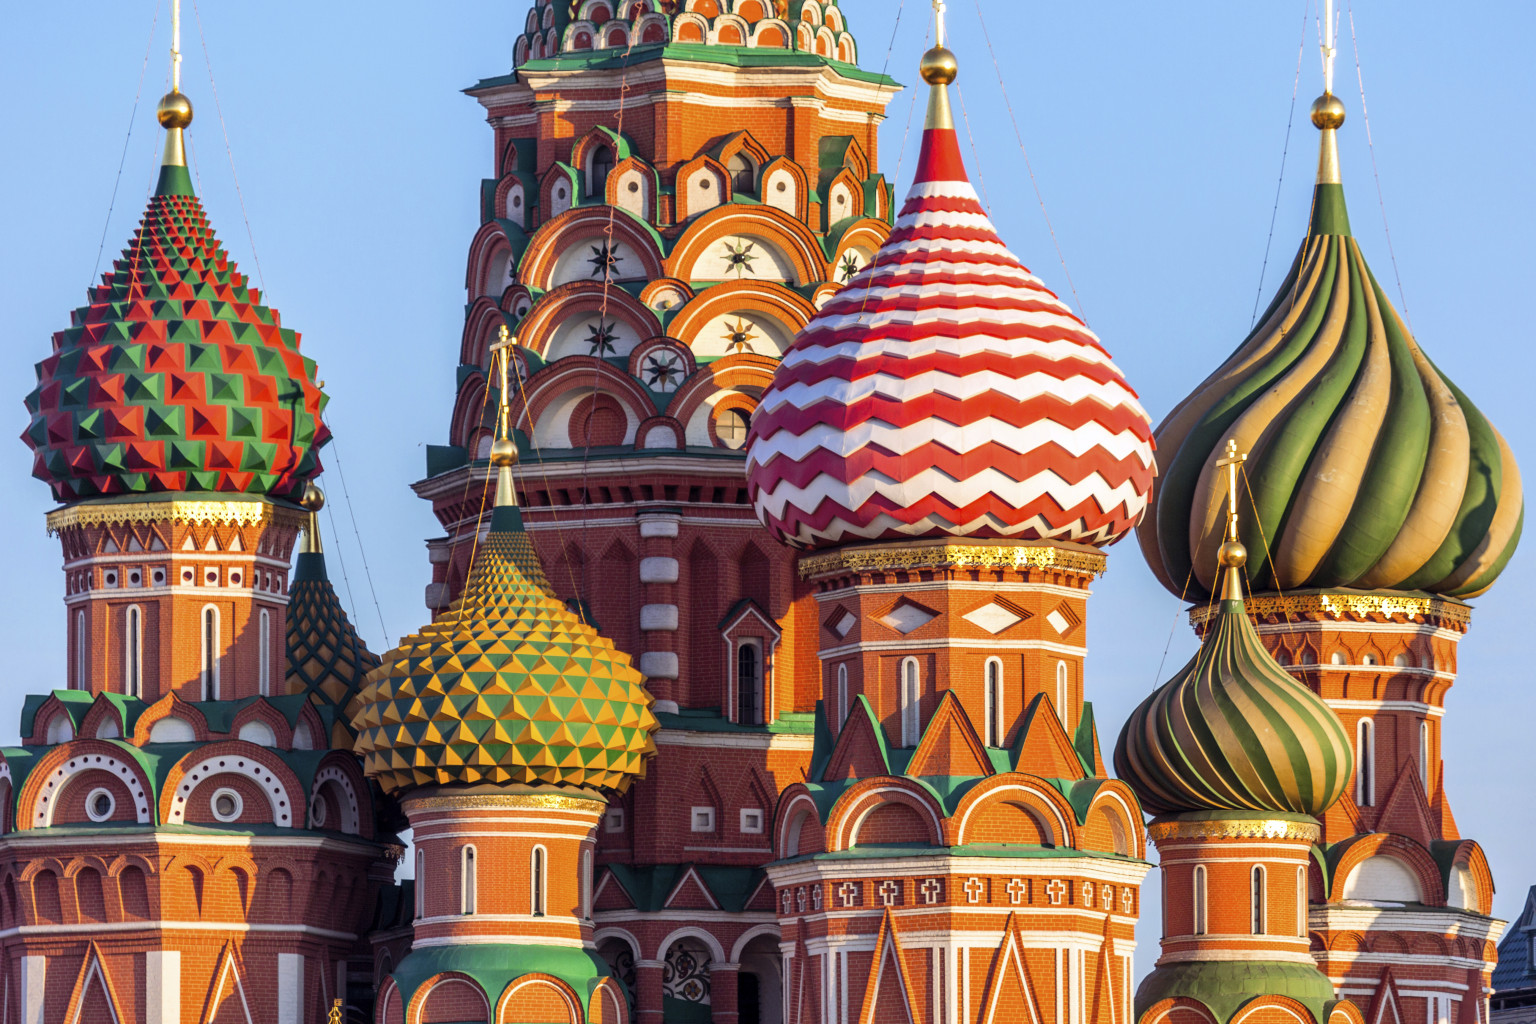

In [2]:
from IPython.display import Image
Image(filename="imagens/russian.jpg") 

In [3]:
imagem = cv2.imread("imagens/russian.jpg")

In [4]:
# Altura, Largura e Canal (B, G, R, padrão do opencv)
imagem.shape

(1024, 1536, 3)

In [5]:
print("Altura: {0} pixels.".format(imagem.shape[0]))
print("Comprimento: {0} pixels.".format(imagem.shape[1]))
print("Canais de Cores: {0} pixels.".format(imagem.shape[2]))

Altura: 1024 pixels.
Comprimento: 1536 pixels.
Canais de Cores: 3 pixels.


In [6]:
# Identificar a cor do primeiro pixel
(b, g, r) = imagem[0,0]
b, g, r

(244, 194, 152)

In [7]:
# Alterando informações dos pixels, entre 0 e 10 em X e Y.
imagem[0:10, 0:10] = (0, 0, 255)

In [8]:
# Lembrar de apertar qualquer tecla para sair da imagem, se fechar pela janela a celula no jupyter trava.
cv2.imshow("Russian", imagem)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# Imagem em Preto e Branco
gray_image = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
cv2.imshow("Russian B&W", gray_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
# Vendo o Canal da imagem em escala de cinza
gray_image.shape

(1024, 1536)

In [11]:
# Quebrando a imagem
b, g, r = cv2.split(imagem)
cv2.imshow("Russian Red Scale", r)
cv2.imshow("Russian Blue Scale", b)
cv2.imshow("Russian Green Scale", g)
cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
# ver os tons de cada cor
zeros = np.zeros(imagem.shape[:2], dtype=np.uint8)
cv2.imshow("Russian Red Scale", cv2.merge([zeros, zeros, r]))
cv2.imshow("Russian Blue Scale", cv2.merge([b, zeros, zeros]))
cv2.imshow("Russian Green Scale", cv2.merge([zeros, g, zeros]))
# criar a imagem novamente
cv2.imshow("Russian complete", cv2.merge([r, r, r]))
cv2.waitKey()
cv2.destroyAllWindows()

## Espaço de Cores: HSV

In [13]:
hsv_image = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

In [14]:
cv2.imshow("Russian HSV", hsv_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
cv2.imshow("Russian Hue", hsv_image[:, :, 0]) # Matiz
cv2.imshow("Russian Saturation", hsv_image[:, :, 1]) # Saturacao
cv2.imshow("Russian Brightess", hsv_image[:, :, 2]) # Brilho
cv2.waitKey()
cv2.destroyAllWindows()

## Histogramas de escalas

In [16]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.style.use('seaborn')

In [17]:
colors = {'b': 0, 'g':1, 'r':2}

def histogram_bgr(image):
    for color in colors:
        histr = cv2.calcHist([image], [colors[color]], None, [256], [0,256])
        plt.plot(histr, color = color)
        plt.xlim([0, 256])
    plt.show()

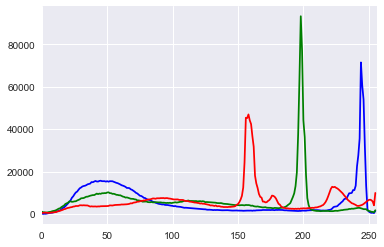

In [18]:
histogram_bgr(imagem)

In [19]:
def histogram_hsv(image_hsv):
    hsv_image = cv2.cvtColor(image_hsv, cv2.COLOR_BGR2HSV)
    hue_hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])
    plt.plot(hue_hist)
    plt.show() 

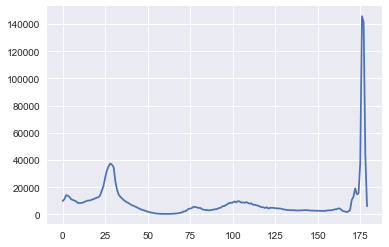

In [20]:
histogram_hsv(hsv_image)

## Processamento de Videos

In [21]:
def histogram_videos():
    
    %matplotlib notebook

    color = "rgb"
    bins = 16

    capture = cv2.VideoCapture("imagens/trapalhões.mpg")

    # Initialize plot.
    fig, ax = plt.subplots()
    ax.set_title('Histogram (RGB)')
    ax.set_xlabel('Bin')
    ax.set_ylabel('Frequency')

    # Initialize plot line object(s). Turn on interactive plotting and show plot.
    lw = 3
    alpha = 0.5
    if color == 'rgb':
        lineR, = ax.plot(np.arange(bins), np.zeros((bins,)), c='r', lw=lw, alpha=alpha)
        lineG, = ax.plot(np.arange(bins), np.zeros((bins,)), c='g', lw=lw, alpha=alpha)
        lineB, = ax.plot(np.arange(bins), np.zeros((bins,)), c='b', lw=lw, alpha=alpha)

    ax.set_xlim(0, bins-1)
    ax.set_ylim(0, 1)

    plt.ion()
    plt.show()

    # Grab, process, and display video frames. Update plot line object(s).
    while True:
        (grabbed, frame) = capture.read()

        if not grabbed:
            break

        # Normalize histograms based on number of pixels per frame.
        numPixels = np.prod(frame.shape[:2])
        cv2.imshow('RGB', frame)
        (b, g, r) = cv2.split(frame)
        histogramR = cv2.calcHist([r], [0], None, [bins], [0, 255]) / numPixels
        histogramG = cv2.calcHist([g], [0], None, [bins], [0, 255]) / numPixels
        histogramB = cv2.calcHist([b], [0], None, [bins], [0, 255]) / numPixels
        lineR.set_ydata(histogramR)
        lineG.set_ydata(histogramG)
        lineB.set_ydata(histogramB)
        fig.canvas.draw()

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

        if 0xFF == ord('p'):
            capture.pause()


    capture.release()
    cv2.waitKey()
    cv2.destroyAllWindows()

# Desafio 1
Crie uma função que receba como parâmetro de entrada o caminho de uma imagem e retorne a cor mais predominante encontrada.  
Escolha apropriadamente a melhor forma de identificação e caracterização de cores.  

Deverão ser testadas 3 imagens que se encontram no Github, pasta imagens.

In [30]:
def cor_predominante(imagem):
    imagem = cv2.imread(imagem)
    hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0], None, [180], [0, 180])
    plt.plot(hist)
    plt.show()

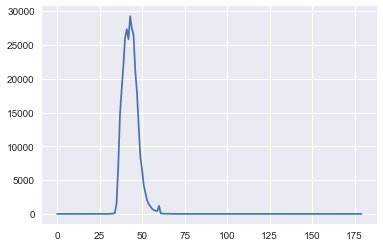

In [31]:
cor_predominante('desafio-1/futebol.jpg')